In [1]:
%pip install seaborn
%pip install plotly
%pip install nbformat
%pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import cv2
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

36/36 [==============================] - 13s 275ms/step
The video is 95.83% likely to be a Normal video.


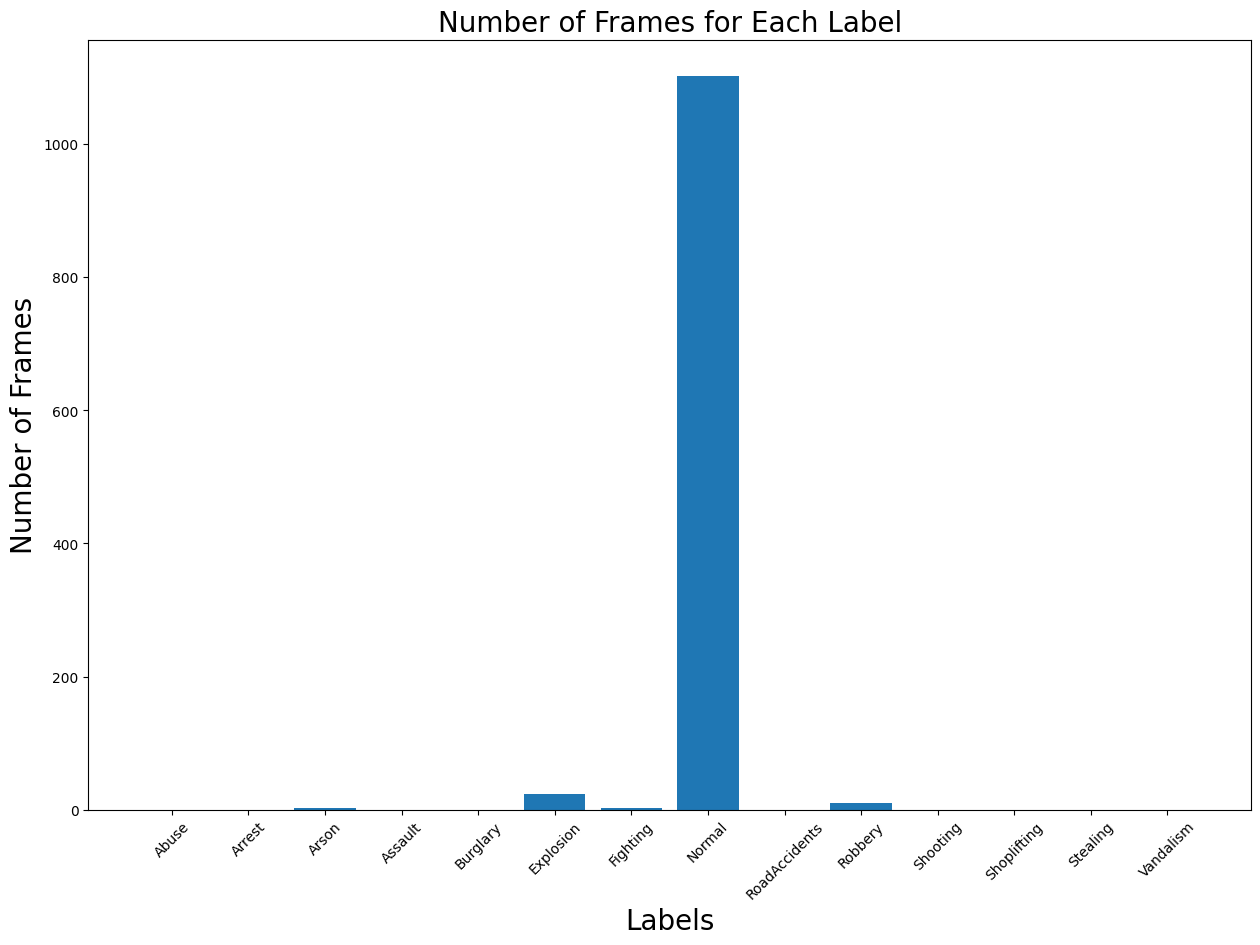

In [3]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('/Video_Anomaly_dectection_kaggle/Anomaly_detection/Trained_model/my_model_epoch_1.h5')
cap = cv2.VideoCapture('/Khoa_hoc_dl_xu_ly_anh/Anomaly-Videos/Abuse/Abuse007_x264.mp4')

frames = []

# Display predictions in a diagram
labels = ['Abuse', 'Arrest', 'Arson', 'Assault', 'Burglary', 'Explosion',
          'Fighting', "Normal", 'RoadAccidents', 'Robbery',
          'Shooting', 'Shoplifting','Stealing','Vandalism']

while(cap.isOpened()):
    # Read a frame from the video
    ret, frame = cap.read()

    if ret == True:
        # Resize the frame to 64x64 pixels
        frame = cv2.resize(frame, (64, 64))
        # Normalize pixel values to [0, 1]
        frame = frame / 255.0
        # Add the frame to the list
        frames.append(np.array(frame))
    else:
        break

# Release the video file
cap.release()

# Convert the list of frames to a 4D numpy array
input = np.stack(frames)

# Reshape the input to the correct shape
input = input.reshape(-1, 64, 64, 3)

# Make a prediction
output = model.predict(input)

# Apply a threshold to the output
threshold = 0.5
predicted_labels = np.where(output > threshold, 1, 0)

# Calculate which label has the most frames
label_counts = np.sum(predicted_labels, axis=0)
most_common_label_index = np.argmax(label_counts)
most_common_label = labels[most_common_label_index]

# Calculate the percent of frames that match the most common label
percent_most_common = (label_counts[most_common_label_index] / len(frames)) * 100

print(f"The video is {percent_most_common:.2f}% likely to be a {most_common_label} video.")

# Adjust the size of the plot
plt.figure(figsize=(15, 10))


# Calculate the total number of frames for each label
label_counts = np.sum(predicted_labels, axis=0)

# Display the number of frames for each label
plt.bar(labels, label_counts)

plt.xlabel('Labels', fontsize=20)
plt.ylabel('Number of Frames', fontsize=20)
plt.title('Number of Frames for Each Label', fontsize=20)
plt.xticks(rotation=45)
plt.show()
